In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])
df.columns=["Class label","Alcohol","Malic_acid"]
df.head()

,Class label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


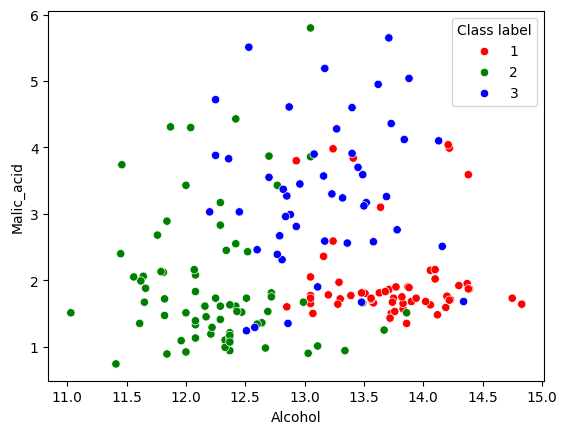

In [5]:
colors={1:"red",2:"green",3:"blue"}
sns.scatterplot(x="Alcohol",y="Malic_acid",hue="Class label",data=df,palette=colors)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(["Class label"],axis=1),df["Class label"],test_size=0.3,random_state=0)
X_train.head()

,Alcohol,Malic_acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #compress all values between 0 and 1

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

round(X_train_scaled.describe(),2)

,Alcohol,Malic_acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


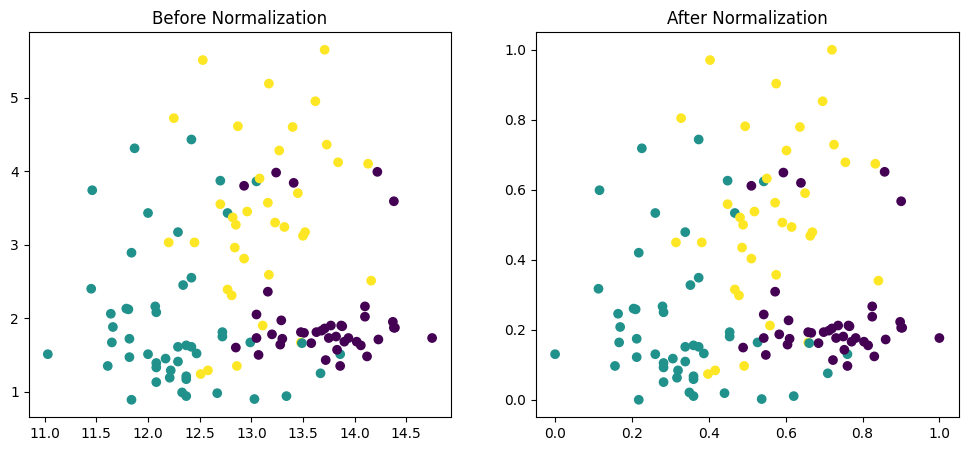

In [8]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Normalization")
ax1.scatter(X_train['Alcohol'],X_train['Malic_acid'],c=y_train)
ax2.set_title("After Normalization")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic_acid'],c=y_train)
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)



In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy without normalization:",accuracy_score(y_test,y_pred))
print("Accuracy with normalization:",accuracy_score(y_test,y_pred_scaled))

Accuracy without normalization: 0.7592592592592593
Accuracy with normalization: 0.7962962962962963
